# Experimental Design, Model Evaluation us Logistic Regression

Following (mostly) Python Machine Learning 3rd (Raschka) Chapter 6

# Training/Test Split
We'll use the [breast cancer dataset from scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

X = bc['data']
y = bc['target']
X_names = bc['feature_names']

bcDf = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
bcDf.columns = list(X_names) + ['target']

pd.set_option('display.max_columns', 50)
bcDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Checking the numerical summaries of this data:

In [3]:
bcDf.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [20]:
bcDf.shape

(569, 31)

## Performing EDA to check for Data Issues or anomalies

In [4]:
bcDf.isna().sum().sum()

0

- No missing values, so no need to impute.

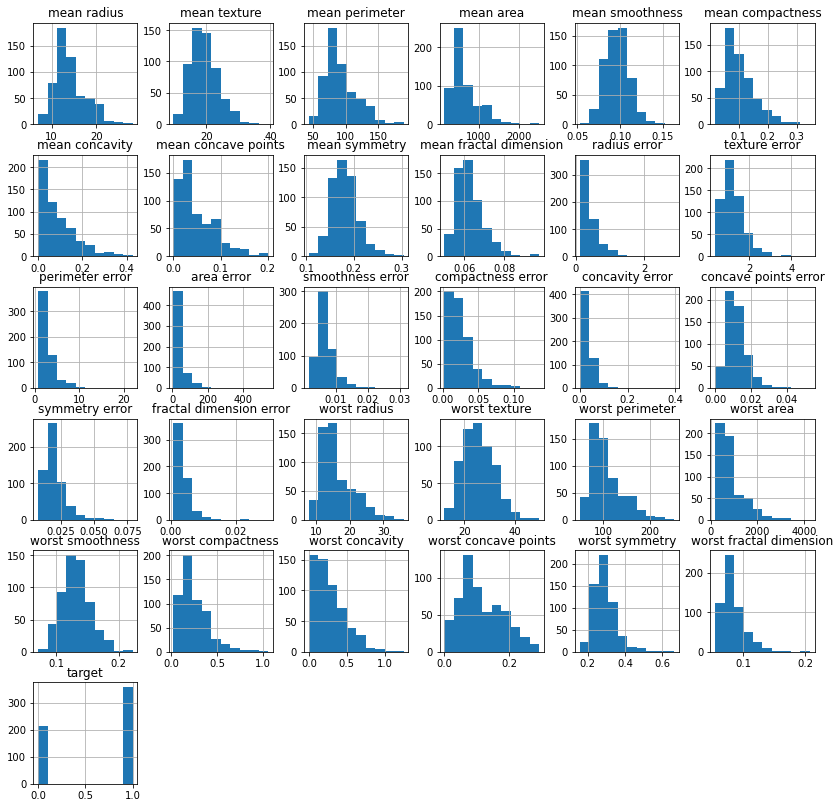

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

bcDf.hist(figsize=(14,14))
plt.show()

- Doesn't look like there are any obvious data quality issues.  
- All numerical, but on different scales, so we'll need to standardize the features.

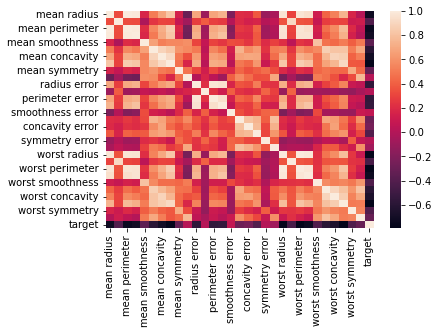

In [6]:
import seaborn as sns

sns.heatmap(bcDf.corr())
plt.show()

- There are a lot of correlated features (that's bad).  
- Multicollinearity is bad for our model  
- We are going to try using Pricipal Component Analysis for feature reduction. 
- We are going to extract 5, which will reduce the feature space from 30 dimensions to 5.  

## Pipeline Gameplan
- Splitting the data into training/test. 
- Creating a feature processing pipeline. 
    - Standardize features. 
    - Extract 5 PCA components. (arbitrary decision; could evaluate)
- Fit a Logistic Regression model.  
- Evaluate accuracy.  

#### We will use the following benefits of pipelines with this process.
- Chains together feature processing and fitting steps.  
- No separate feature transformation fits for test data.  
- Plays nice with many of the more robust evaluation options.  

## Split the data

In [7]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')


Training sample: 455
Test sample: 114


In [8]:
sum(y)/len(y)

0.6274165202108963

In [9]:
sum(y_train)/len(y_train)

0.6263736263736264

In [10]:
sum(y_test)/len(y_test)

0.631578947368421

## Create our pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=comp)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])

## Make our predictions on the test set and determine performance estimates

In [13]:
from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[39  3]
 [ 1 71]]


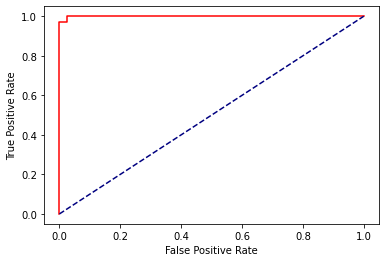

In [17]:
from sklearn.metrics import roc_curve

def generate_probs(X, model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test, m))
# fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train, m))

plt.plot(fpr_test, tpr_test,'-r')
# plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

# print("training roc score", roc_auc_score(y_train, generate_probs(X_train, m)))
print("test roc score", roc_auc_score(y_test, generate_probs(X_test, m)))

training roc score 0.9948194014447884
test roc score 0.9986772486772487


### Model Summary and Analysis

- Model is showing overfitting, ROC score is very high.
- Reasons could be our small dataset, leading to not enough data for training and testing of the model.
- Techinques like cross-validation can be implemented to improve model performance and provide better training data.